In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use("seaborn-whitegrid")

C:\Users\Pichau\AppData\Local\Temp\ipykernel_13372\1138981715.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
sales = pd.read_csv('train.csv', index_col='date', parse_dates=['date'])

In [4]:
book_sales = sales[sales['family'] == 'BOOKS'] #Filtrando apenas livros
book_sales.index = book_sales.index.to_period("D") #Cobsiderando o index pelo dia
book_sales = book_sales.groupby(book_sales.index).sum() #Agraupand os valores de venda por dia
book_sales = book_sales.drop(['id', 'store_nbr'], axis=1)
book_sales['time'] = np.arange(len(book_sales.index)) #Cria uma nova coluna 'time', com a marcação do tempoem em ordem cronológica: 1, 2, 3, 4, etc.
book_sales['lag_1'] = book_sales['sales'].shift(1) # Cria um lag temporal de 1 período, nesse caso, 1 dia

C:\Users\Pichau\AppData\Local\Temp\ipykernel_13372\4062014224.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  book_sales = book_sales.groupby(book_sales.index).sum() #Agraupand os valores de venda por dia


In [10]:
book_sales.index

PeriodIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
             '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
             '2013-01-09', '2013-01-10',
             ...
             '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
             '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
             '2017-08-14', '2017-08-15'],
            dtype='period[D]', name='date', length=1684)

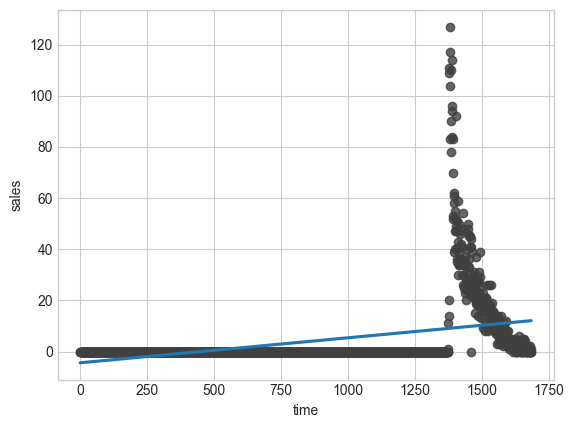

In [14]:
fig, ax = plt.subplots()
#ax.plot('time', 'sales', data=book_sales, color='0.75')
ax = sns.regplot(x='time', y='sales', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))